# Basic test: Smoothing the noised signal 

## 2015.10.19 DW

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as scnf
import sys
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') #Add a new path with needed .py files
from git import Repo
import os
from findGitRepo import findGitRepo

In [2]:
path = os.path.dirname(os.path.realpath('__file__'))   #set path to the current directory, where the file is saved
repoPath = findGitRepo(path)                           #search for the \.git directory 
repo = Repo(repoPath)
repo.commit().hexsha                                   #print the commit hash 

u'db3afb7d751c2eb0d650b1a312a463bd4c79ac06'

In [3]:
% matplotlib inline

I am trying to remove white noise from the original wave with different filters.

### Define the sine wave with wave number 5 and add white noise.

In [4]:
data = np.fromfunction( lambda x: np.sin((x-128 / 2)/1024 * 2 * np.pi * 5), (1024 + 128 / 2, ) ) #creating a sine wave with wave number 5
noise = np.random.normal(0,1.0,len(data)) #creating an array with random values and the same length as the data array
signal = data + noise
signal1 = signal

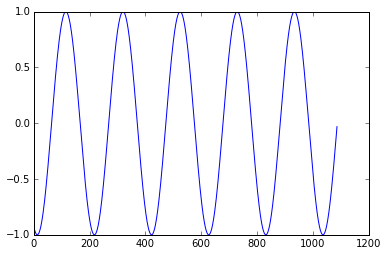

In [5]:
plt.plot(data)

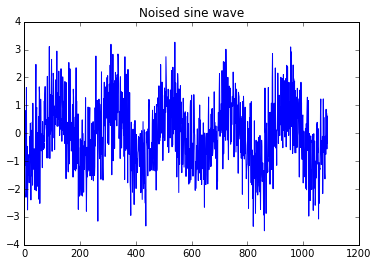

In [6]:
plt.plot(signal1)
plt.title("Noised sine wave")

### Smooth the signal with a moving averege filter.

In [7]:
for i in range (0,5):
    signal = np.convolve(signal, np.ones(30)/30, mode = 'same')  #moving averege filter with a length of 30, 5 times calculated

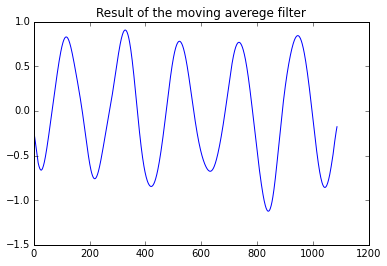

In [8]:
plt.plot(signal)
plt.title("Result of the moving averege filter")

### Smooth the signal with a gaussian filter.

In [9]:
smoothed = scnf.gaussian_filter(signal1, 30) #gaussian filter of the noised signal with a standard deviation for Gaussian kernel of 30

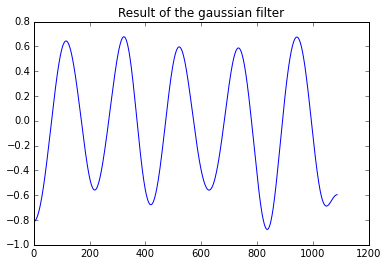

In [10]:
plt.plot(smoothed)
plt.title("Result of the gaussian filter")

Here you can see the results of both filters. The results are nearly the same and depend on the noise. In fact that the moving averege filter must be calculated multiple times to get a smooth result, the gaussian filter maybe is the better option.